# 1.4 Pseudo-Inverse, Least-Squares, and Regression
* Usage of SVD
    * Linear systems of eqiations $Ax = b$에 대해서 해가 없는 over determined의 경우, $|Ax-b|_2^2$을 최소화 하는 값을 찾아야 된다.
    * 이 방법을 least-squares solution이라 한다.
    * 해가 무한한 경우, $||x||_2$을 최소화 하는 값을 찾아야 한다.
    * 이 방법을 minimum-norm solution이라 한다.
    * SVD는 이 문제를 최적화 하는 방법이다.
    * Full SVD가 아닌 $\Sigma$의 비대각 부분과 대각 원소 중 singular value가 0인 부분을 모두 제거하고 제거된 $\Sigma$에 대응되는 $U$와 $V$의 원소도 함께 제거해 차원을 줄인 Truncated SVD를 적용한다.
    * $A = \~{U}\~{\Sigma}\~{V^*}$의 A에 $\~{a}, \~{\Sigma}, \~{V^*}$ 역을 취할 수 있다. 
    * $left$ $pseudo-inverse$의 결과를 얻을 수 있다.
    * $A^+ = \~{V}\~{\Sigma}^{-1}\~{U^*}$ -> $A^+A = \~{V}\~{V}^*$
    * truncated SVD가 0이 아닌 모든 singular value를 잡아야 $A^+A=I_{m \times m}$가 성립한다.
    * 위를 이용해 $x$값을 구하고 $Ax = b$에 대입하면 $A\~{x} = \~{U}\~{U^*}b$를 얻을 수 있다.
    * b가 \~{U}의 열에 존재할 때만 \~{x}가 성립한다.

* Condition Number
    * A행렬의 condition number란 행렬이 얼마나 민감한지 나타내는 척도인데 이는 행렬의 특이값과 연관이 있다.
    * $k(A) = {\sigma}_{max}(A)/{\sigma}_{min}(A) $
    * condition number을 줄이기 위해서는 SVD를 더 transcate를 하는 방법이 있다.

* One-Dimensional Linear Regression
    * 회귀는 데이터를 기반으로 변수를 연관시키는 중요한 통계적 도구이다.
    * 독립변수 x가 1개일 때의 회귀이다.
    * 데이터가 선형적 관계에 있다 가정할 때, $[b] = [a]x = \~{U}\~{\Sigma}\~{V}^*x$ -> $x = \~{V}\~{\Sigma}^{-1}\~{U^*}b$이다.
    * least-square해를 찾기 위해 pseudo-inverse를 취하면 $x = a*b/||a||^2_2$ 를 얻을 수 있다.
    * x가 벡터a를 벡터b로 최적의 매핑을 한다 생각하면 x는 b의 dot product를 a 방향으로 normalize하며 구할 수 있다.
    * 두번째 normalizing factor $||a||_2$를 더해 구해준다.

# Linear

AttributeError: Line2D.set() got an unexpected keyword argument 'MarkerSize'

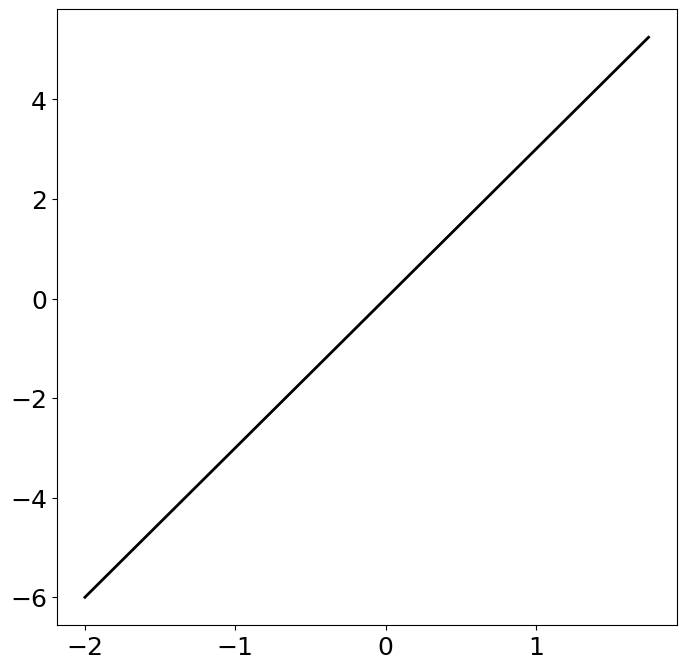

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # Add noise

plt.plot(a, x*a, color='k', linewidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', color='r', MarkerSize = 10, label='Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

plt.plot(a,xtilde * a,'--',color='b',linewidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()


In [ ]:
# Three methods of computing regression

xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) @ b

# The third method is specific to Matlab:
# xtilde3 = regress(b,a)

* Multi-linear Regression
    * 선형 회귀와 동일하지만 2차원에서 n차원으로 늘리는 차이가 있다.
    * 목표는 x를 weighting해줘서 어떠한 요소가 가장 영향을 주는지 확인할 수 있다.

# Cement


4
1


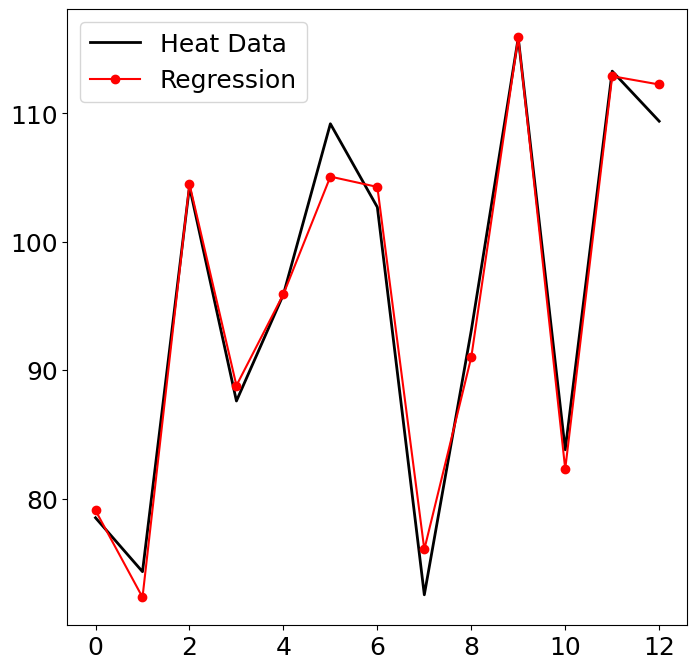

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
A = np.loadtxt(os.path.join('..','DATA','hald_ingredients.csv'),delimiter=',')
b = np.loadtxt(os.path.join('..','DATA','hald_heat.csv'),delimiter=',')

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, color='k', linewidth=2, label='Heat Data') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.legend()
plt.show()

# Housing

* 보스턴 집값을 예측하는 예시인데 집값과 상관있는 13가지 요소를 회귀분석하여 추세와 가중 요소를 판단할 수 있다.

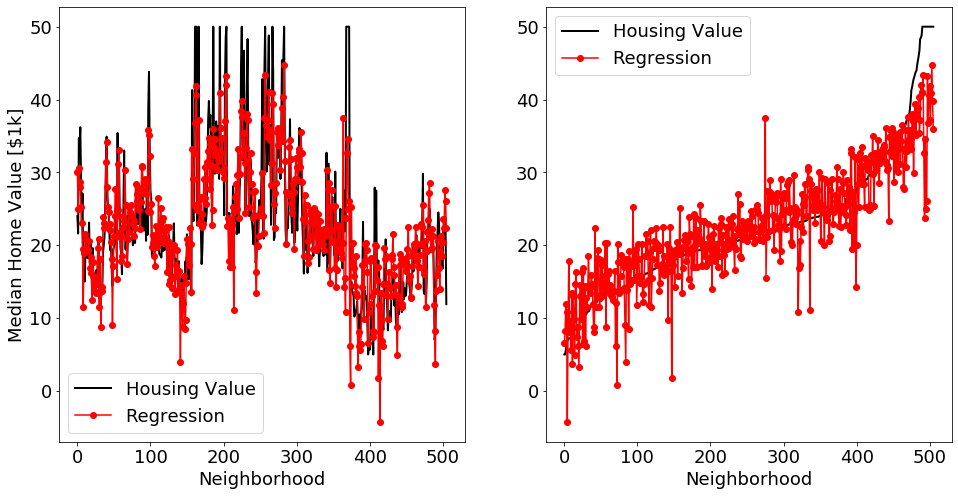

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
H = np.loadtxt(os.path.join('..','DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)


# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
plt.plot(b[sort_ind], color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

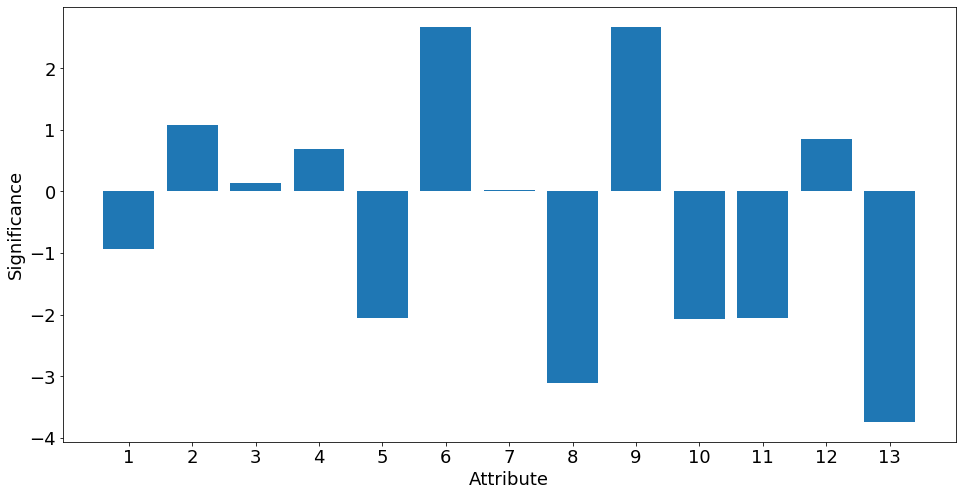

In [ ]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()
